<a href="https://colab.research.google.com/github/dahlia52/ESAA_2022-2/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD_%EA%B0%80%EC%9D%B4%EB%93%9C_%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ch8.6-9(7 제외) pg. 512-516, 529~543

## 06 토픽 모델링 (Topic-Modeling) - 20 뉴스 그룹

- 토픽 모델링: 문서 집합에 숨어 있는 주제를 찾아내는 것

- 많은 양의 문서가 있을 때 사람이 이 문서를 다 읽고 핵심 주제를 찾는 것은 매우 많은 시간이 소요되므로 머신러닝 기반의 토픽 모델링 이용

- 주제를 효과적으로 표현할 수 있는 중심 단어를 함축적으로 추출



In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x', 'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

# 위에서 cats 변수로 기재된 카테고리만 추출. fetch_20newsgroups()의 categories에 cats 입력
news_df = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'), categories=cats, random_state=0)

# LDA는 Count 기반의 벡터화만 적용함.
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))

feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [22]:
# 토픽의 개수는 8개로 지정
lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [23]:
print(lda.components_.shape) # 8개의 토픽별로 1000개의 word 피처
# 개별 토픽별로 각 word 피처가 얼마나 많이 그 토픽에 할당되었는지에 대한 수치
# 높은 값일수록 해당 word 피처는 그 토픽의 중심 word가 됨.
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

In [24]:
# 각 토픽별로 연관도가 높은 순으로 Word를 나열
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)
    
    # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array 인덱스를 반환
    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    # top_indexes 대상인 인덱스별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
    feature_concat = ' '.join([feature_names[i] for i in top_indexes])
    print(feature_concat)
  
# CountVectorizer 객체 내의 전체 word의 명칭을 get_features_names()를 통해 추출
feature_names = count_vect.get_feature_names()
# 토픽별 가장 연관도가 높은 word를 15개만 추출
display_topics(lda, feature_names, 15)

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개를 주제로 추출 결과

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run


## 08 문서 유사도

### 문서 유사도 측정 방법 - 코사인 유사도

- 코사인 유사도: 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡토의 상호 방향성이 얼마나 유사한지에 기반함. 즉, 두 벡터 사이의 사잇각을 구하여 얼마나 유사한지 수치로 적용함.

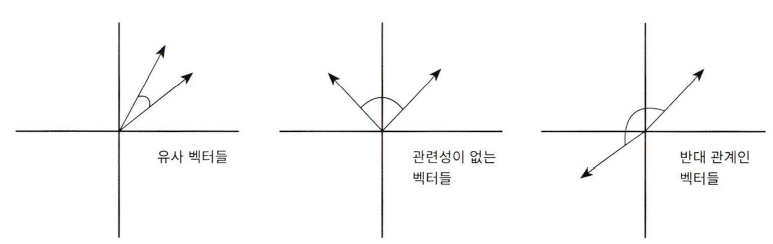

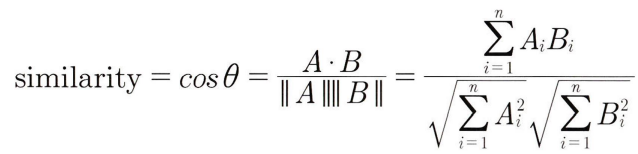

문서의 유사도 비교에 코사인 유사도를 많이 사용하는 이유

- 문서를 피처 벡터화 변환하면 차원이 매우 많은 희소 행렬이 되기 쉬움. 이러한 희소 행렬 기반에서 문서와 문서 벡터 간의 크기에 기반한 유사도 지표는 정확도가 떨어지기 쉬움.

- 문서가 매우 긴 경우 단어의 빈도수가 더 많을 것이기 때문에 빈도수에만 기반해서는 비교가 어려움.

In [25]:
import numpy as np

def cos_similarity(v1, v2):
  dot_product = np.dot(v1, v2)
  l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
  similarity = dot_product/l2_norm
  return similarity

In [26]:
# doc_list로 정의된 3개의 간단한 문서의 유사도를 비교하기 위해 TF-IDF로 벡터화된 행렬로 변환
from sklearn.feature_extraction.text import TfidfVectorizer
doc_list =  ['if you take the blue pill, the story ends',
             'if you take the red pill, you stay in Wonderland',
             'if you take the red pill, I show you how deep the rabbit hole goes']
tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [33]:
# TfidfVectorizer로 transform()한 결과는 희소 행렬이므로 밀집 행렬로 변환
feature_vect_dense = feature_vect_simple.todense()
# 첫 번째 문장과 두 번째 문장, 세번째 문장의 피처 벡터 추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)

# 첫 번째 문장과 두 번째 문장의 피처 벡터로 2개의 문장의 코사인 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

similarity_simple = cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402
문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


- 사이킷런은 코사인 유사도 측정을 위해 sklearn.metrics.pairwise.cosine_similarity API를 제공함.

- consine_similarity(비교 기준이 되는 문서의 피처 행렬, 비교되는 문서의 피처 행렬)

- 희소 행렬, 밀집 형태 모두 가능하며, 행렬 또는 배열 모두 가능함. 따라서, 변환 작업 필요X

In [37]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)
# 첫 번째 유사도 값: 첫 번쨰 문서 자신에 대한 유사도 측정
# 두 번쨰 유사도 값: 첫 번째 문서와 두 번쨰 문서의 유사도
# 세 번쨰 유사도 값: 첫 번째 문서와 세 번쨰 문서의 유사도

[[1.         0.40207758 0.40425045]]


In [38]:
# 첫 번쨰 문서 자신에 대한 유사도 측정을 제외하고 싶다면,
from sklearn.metrics.pairwise import cosine_similarity
similarity_simple_pair = cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [39]:
# 모든 개별 문서에 쌍으로 코사인 유사도 측정하기
similarity_simple_pair = cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path = r'/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/OpinosisDataset1.0/topics'

# path로 지정한 디렉토리 밑에 있는 모든 .data 파일의 파일명을 리스트로 취합
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text=[]

# 개별 파일의 파일명은 filname_list로 취합
# 개별 파일의 파일 내용은 DataFrame 로딩 후 다시 string으로 변환해 opinion_text list로 취합
for file_ in all_files:
  # 개별 파일을 읽어 DataFrame으로 생성
  df = pd.read_table(file_, index_col=None, header=0, encoding='latin1')
  # 절대 경로로 주어진 파일명을 가공
  # 맨 마지막 .data 확장자도 제거
  filename_ = file_.split('/')[-1]
  filename = filename_.split('.')[0]
  # 파일명 list와 파일 내용 list에 파일명과 파일 내용을 추가
  filename_list.append(filename)
  opinion_text.append(df.to_string())

# 파일명 list와 파일 내용 list 객체를 DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

,filename,opinion_text
0,battery-life_amazon_kindle,...
1,battery-life_ipod_nano_8gb,...
2,accuracy_garmin_nuvi_255W_gps,...
3,bathroom_bestwestern_hotel_sfo,...
4,voice_garmin_nuvi_255W_gps,...


In [53]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [48]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

# 단어 원형 추출 함수
lemmar = WordNetLemmatizer()

# 토큰화한 각 단어들의 원형을 리스트로 반환
def LemTokens(tokens):
  return [lemmar.lemmatize(token) for token in tokens]

# 특수 문자 사전 생성: {33: None ...}
# ord('문자열') : 문자열의 아스키 코드 반환
# string.puncutaion : 문자열의 모든 구두점이 들어있음
# dict(key, value) 형태로 모든 구두점의 각 아스키 코드를 key값으로 넣음
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
  # 텍스트 소문자 변경 후 특수 문자 제거
  text_new = text.lower().translate(remove_punct_dict)
  # 단어 토큰화
  word_tokens = nltk.word_tokenize(text_new)
  # 단어 원형 추출
  return LemTokens(word_tokens)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english', ngram_range=(1,2), 
                             min_df=0.05, max_df=0.85) # 빈도수 0.05 이하, 0.85 이상 단어 제거
# opinion_text 칼럼 값으로 피처 벡터화 수행
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

In [58]:
from sklearn.cluster import KMeans
# 3개 집합으로 군집화 수행
km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

# 소속 군집을 cluster_label 칼럼으로 할당
document_df['cluster_label'] = cluster_label

In [59]:
document_df.head()

,filename,opinion_text,cluster_label
0,battery-life_amazon_kindle,...,1
1,battery-life_ipod_nano_8gb,...,1
2,accuracy_garmin_nuvi_255W_gps,...,1
3,bathroom_bestwestern_hotel_sfo,...,2
4,voice_garmin_nuvi_255W_gps,...,1


- 위 문서는 전자제품, 호텔, 자동차를 주제로 군집화됨. 

- 군집화된 문서를 이용해 다른 문서 간의 유사도를 구함

In [60]:
from sklearn.metrics.pairwise import cosine_similarity
# cluster_label=1인 데이터는 호텔로 군집화된 데이터. DataFrame에서 해당 인덱스를 추출
hotel_indexes = document_df[document_df['cluster_label']==1].index
print('호텔로 군집화된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 군집화된 데이터 중 첫 번째 문서를 추출해 파일명 표시
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print("##### 비교 기준 문서명 ", comparison_docname, " 와 타 문서 유사도 #####")

'''document_df에서 추출한 Index 객체를 feature_vect로 입력해 호텔 군집화된 feature_vect 추출
이를 이용해 호텔로 군집화된 문서 중 첫 번째 문서와 다른 문서 간의 코사인 유사도 측정'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 군집화된 문서들의 DataFrame Index: Int64Index([ 0,  1,  2,  4,  5,  8, 11, 12, 15, 18, 19, 20, 21, 28, 33, 34, 35,
            36, 37, 38, 40, 43, 46, 49, 50],
           dtype='int64')
##### 비교 기준 문서명  battery-life_amazon_kindle  와 타 문서 유사도 #####
[[1.         0.79742523 0.03004155 0.01718587 0.03975485 0.03251715
  0.18926406 0.0197642  0.12323469 0.02271738 0.096442   0.88509976
  0.10569832 0.14028442 0.07455773 0.0505384  0.29855545 0.03924845
  0.20713047 0.1083282  0.02470874 0.05926201 0.21594904 0.01240808
  0.02086573]]


Text(0.5, 1.0, 'battery-life_amazon_kindle')

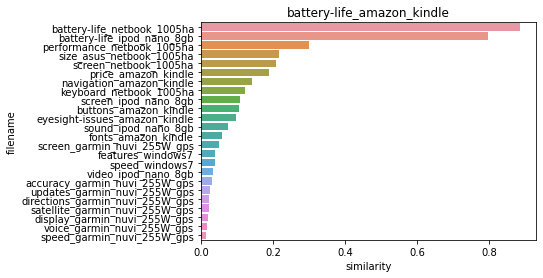

In [65]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 첫 번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스를 추출하되 자기 자신은 제외
sorted_index = similarity_pair.argsort()[:,::-1]
sorted_index = sorted_index[:,1:]

# 유사도가 큰 순으로 hotel_indexes를 추출해 재정렬
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)]

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 인덱스와 유사도 값을 이용해 파일명과 유사도 값을 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

In [69]:
hotel_1_sim_df.head()

,filename,similarity
20,battery-life_netbook_1005ha,0.885100
1,battery-life_ipod_nano_8gb,0.797425
35,performance_netbook_1005ha,0.298555
46,size_asus_netbook_1005ha,0.215949
37,screen_netbook_1005ha,0.207130


## 09 한글 텍스트 처리 - 네이버 영화 평점 감성 분석

### 한글 NLP 처리의 어려움

- 원인: 띄어쓰기, 조사에 따라 의미가 달라짐.

### KoNLPy

- 대표적인 한글 형태소 패키지

- 형태소 분석: 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅(POS tagging)을 부착하는 작업




In [70]:
pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.5 MB/s 
     |████████████████████████████████| 465 kB 41.7 MB/s 


In [73]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ratings_train.txt', sep='\t')
train_df.head(3)
# label: 1 - 긍정, 0 - 부정

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [74]:
train_df['label'].value_counts() # 균등한 분포

0    75173
1    74827
Name: label, dtype: int64

In [75]:
import re
train_df = train_df.fillna(' ') # NA는 공백으로 처리
# 정규 표현식을 이용해 숫자를 공백으로 변경(정규 표현식으로 \d는 숫자를 의미)
train_df['document'] = train_df['document'].apply(lambda x: re.sub(r"\d+"," ",x))

# 테세트 데이터 세트를 로딩하고 동일하게 Null 및 숫자를 공백으로 변환
test_df = pd.read_csv('/content/drive/MyDrive/Data/파이썬 머신러닝 완벽가이드/ratings_test.txt', sep='\t')
test_df = test_df.fillna(' ')
test_df['document'] = test_df['document'].apply(lambda x: re.sub(r"\d+", " ", x))

# id 칼럼 삭제 수행
train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [77]:
# 각 문장을 한글 형태소 분석을 통해 형태소 단어로 토큰화 후 TF-IDF 방식으로 단어를 벡터화
# 한글 형태소 엔진은 SNS 분석에 적합한 Twitter 클래스 이용

from konlpy.tag import Twitter
twitter = Twitter()
def tw_tokenizer(text):
  # 입력 인자로 들어온 텍스트를 형태소 단어로 토큰화해 리스트 형태로 반환
  tokens_ko = twitter.morphs(text) # 문장을 형태소 단위로 토큰화해 list 객체로 반환
  return tokens_ko

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Twitter 객체의 morphs() 객체를 이용한 tokenizer를 사용. ngram_range는 (1,2)
tfidf_vect = TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train = tfidf_vect.transform(train_df['document'])

In [82]:
# 로지스틱 회귀를 이용해 감성 분석 분류 수행
lg_clf = LogisticRegression(random_state=0)

# 파라미터 C 최적화를 위해 GridSearchCV를 이용
params = {'C':[1,3.5,4.5,5.5,10]}
grid_cv = GridSearchCV(lg_clf, param_grid = params, cv=3, scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_, round(grid_cv.best_score_),4)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 1 4


In [83]:
# 테스트 세트를 이용해 예측할 때는 학습할 때 적용한 TfidfVectorizer를 그대로 사용해야 학습 시 설정된 TfidfVectorizer의 피처 개수와 변환할 피처 개수가 같아짐.

from sklearn.metrics import accuracy_score
# 학습 데이터를 적용한 TfidfVectorizer를 이용해 테스트 데이터를 TF-IDF 값으로 피처 변환함
tfidf_matrix_test = tfidf_vect.transform(test_df['document'])

# classifier는 GridSearchCV에서 최적 파라미터로 학습된 classifier를 그대로 이용
best_estimator = grid_cv.best_estimator_
preds = best_estimator.predict(tfidf_matrix_test)
print('Logistic Regression 정확도:', accuracy_score(test_df['label'],preds))

Logistic Regression 정확도: 0.86186
